<a href="https://colab.research.google.com/github/rehanagithub/website/blob/main/copy_of_untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from  sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import os
import cv2
import numpy as np
import zipfile
from io import BytesIO
from sklearn.model_selection import train_test_split

# Function to load and preprocess images from a ZIP file
def load_and_preprocess_data_from_zip(zip_file_path, img_size=(128, 128)):
    images = []
    labels = []

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if file_name.endswith(".jpg"):
                with zip_ref.open(file_name) as file:
                    img_bytes = file.read()
                    img_array = np.frombuffer(img_bytes, np.uint8)
                    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
                    img = cv2.resize(img, img_size)
                    img = img.astype('float32') / 255.0
                    images.append(img)

                    label = os.path.basename(os.path.dirname(file_name))  # Assuming folder names are labels
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data from ZIP file
zip_file_path = "momos.zip"
images, labels = load_and_preprocess_data_from_zip(zip_file_path)

# Split data into training and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Optionally, you can save the preprocessed data to disk
np.save("train_images.npy", train_images)
np.save("test_images.npy", test_images)
np.save("train_labels.npy", train_labels)
np.save("test_labels.npy", test_labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the number of classes in your dataset
num_classes = 10  # For example

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a classification layer with the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the number of classes in your dataset
num_classes = 10  # For example

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a classification layer with the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the bottom layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 4,992,778 (19.05 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [ ]:
import tensorflow as tf

In [ ]:
print(test_labels.shape)

(13,)


In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade tensorflow


In [ ]:
import numpy as np

# Convert data types and preprocess images
train_images_preprocessed = np.array(train_images_preprocessed).astype(np.float32) / 255.0
test_images_preprocessed = np.array(test_images_preprocessed).astype(np.float32) / 255.0

# Convert labels to integer format (assuming they are string labels)
label_to_index = {label: index for index, label in enumerate(np.unique(train_labels_preprocessed))}
train_labels_preprocessed = np.array([label_to_index[label] for label in train_labels_preprocessed])
test_labels_preprocessed = np.array([label_to_index[label] for label in test_labels_preprocessed])

# Ensure labels are in integer format
train_labels_preprocessed = train_labels_preprocessed.astype(np.int32)
test_labels_preprocessed = test_labels_preprocessed.astype(np.int32)


In [ ]:
print(f"Test images dtype: {test_images_preprocessed.dtype}")
print(f"Test labels dtype: {test_labels_preprocessed.dtype}")

Test images dtype: float32
Test labels dtype: int32


In [ ]:
print(f"Train images dtype: {train_images_preprocessed.dtype}")
print(f"Train labels dtype: {train_labels_preprocessed.dtype}")

Train images dtype: float32
Train labels dtype: int32


In [ ]:
import numpy as np

# Convert images to numeric format and normalize
train_images_preprocessed = np.array(train_images_preprocessed).astype('float32') / 255.0
test_images_preprocessed = np.array(test_images_preprocessed).astype('float32') / 255.0

# Convert labels to numeric format if necessary
train_labels_preprocessed = np.array(train_labels_preprocessed).astype('U5')
test_labels_preprocessed = np.array(test_labels_preprocessed).astype('U5')


In [ ]:
import numpy as np

# Convert string labels to integer labels
label_to_index = {label: index for index, label in enumerate(np.unique(train_labels_preprocessed))}
train_labels_preprocessed = np.array([label_to_index[label] for label in train_labels_preprocessed])
test_labels_preprocessed = np.array([label_to_index[label] for label in test_labels_preprocessed])

# Convert integer labels to int32
train_labels_preprocessed = train_labels_preprocessed.astype('int32')
test_labels_preprocessed = test_labels_preprocessed.astype('int32')


In [ ]:
# Train the model
history = model.fit(train_images_preprocessed, train_labels_preprocessed, batch_size=32, epochs=10, validation_data=(test_images_preprocessed, test_labels_preprocessed))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_preprocessed, test_labels_preprocessed)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_preprocessed, test_labels_preprocessed)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 0.0


In [ ]:
from sklearn.metrics import classification_report

# Predict labels for the test set
y_pred = model.predict(test_images_preprocessed)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute classification report
print(classification_report(test_labels_preprocessed, y_pred_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


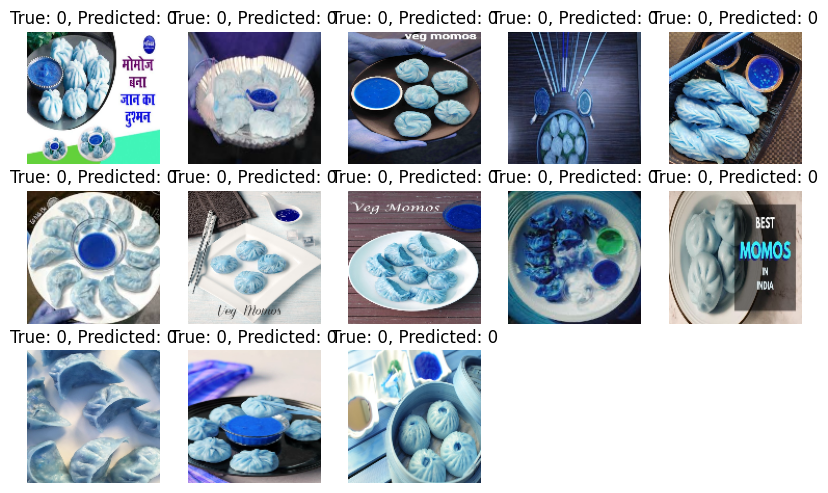

Misclassified Images:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(test_images_preprocessed)
y_pred_labels = np.argmax(y_pred, axis=1)

# Plot sample images along with their predicted labels and true labels
num_samples = min(25, len(test_images_preprocessed))  # Ensure that we don't exceed the number of available test images
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_preprocessed[i])
    plt.title(f"True: {test_labels_preprocessed[i]}, Predicted: {y_pred_labels[i]}")
    plt.axis('off')
plt.show()

# Explore misclassified images
misclassified_indices = np.where(y_pred_labels != test_labels_preprocessed)[0]
print("Misclassified Images:")
for i in misclassified_indices:
    plt.imshow(test_images_preprocessed[i])
    plt.title(f"True: {test_labels_preprocessed[i]}, Predicted: {y_pred_labels[i]}")
    plt.axis('off')
    plt.show()
